In [1]:
#load packages
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt

from datetime import datetime #NEW: If you want to time calculations
from math import sqrt #NEW: For taking square roots, not totally necessary
from matplotlib import cm
from sklearn.linear_model import LinearRegression 
from tqdm import tqdm
%matplotlib inline

#Just for prep
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
#Load Data
file_path = ''
music = pd.read_csv(file_path + 'modified_spotify_data.csv')

In [3]:
#Test Train Split
train = music.sample(frac=0.8,random_state=0) 
test = music.drop(train.index)

train = train.reset_index(drop = True) 
test = test.reset_index(drop = True)

In [4]:
#Define RSS function
def RSS(values, predictions):
    diffs = values - predictions
    squares = diffs*diffs
    return squares.sum()

### Begin Practicum

In this practicum, we will be dealing with a list of songs that are on spotify and we will be trying to predict how popular they are.  We will measure popularity via the variable `streams`.

You should not that while `track_name` and `artist(s)_name` are helpful variables for understanding what songs we are dealing with, they are text data, and will *not* be used as input to our model. 

In [5]:
music.head()

,track_name,artist(s)_name,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_none
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,141381703,125,80,89,83,31,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LALA,Myke Towers,1,133716286,92,71,61,74,7,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,vampire,Olivia Rodrigo,1,140003974,138,51,32,53,17,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Cruel Summer,Taylor Swift,1,800840817,170,55,58,72,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WHERE SHE GOES,Bad Bunny,1,303236322,144,65,23,80,14,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Question 1:** What are the mean and median stream values in our data?

In [6]:
music['streams'].mean() 

np.float64(514137424.93907565)

In [7]:
music['streams'].median()

np.float64(290530915.0)

<span style="color:red"> **Answer for Question 1:** </span> Mean: 514137424 Median: 290530915

For the record, here is a nice visual of the distribution of `stream` values.

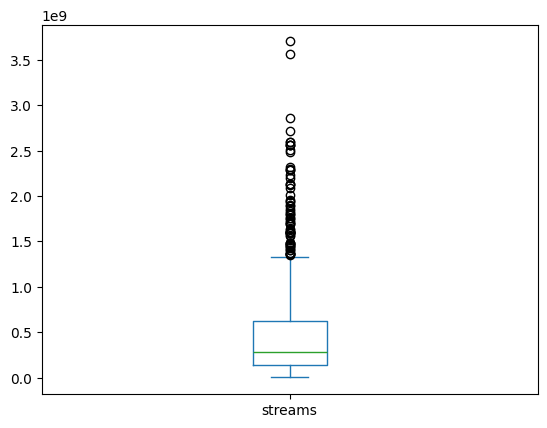

In [8]:
train['streams'].plot.box()
plt.show()

**Task 2:** Build a model that uses the variables `bpm`, `danceability_%`,`instrumentalness_%`, and  `speechiness_%` to predict how many `streams` a song will have.

**Question:** Which of the input features have positive coefficients in the model? 

In [9]:
features = ['bpm', 'danceability_%','instrumentalness_%','speechiness_%']
X = train[features]
Y = train['streams']

model = LinearRegression().fit(X,Y)

In [10]:
print(model.coef_)

[  135097.28502799 -2354362.90519021 -3213640.18276227 -5524030.40725799]


<span style="color:red"> **Answer for Question 2:** </span> bpm 

**Question 3:**  Of the `example_features` listed below, what is the best 2-feature model for predicting `streams`? 

In [11]:

example_features = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%', 'major_key','key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E','key_F', 'key_F#', 'key_G', 'key_G#', 'key_none']

pairs = list(itertools.combinations(example_features, 2))

RSS_list = [] 
for features in pairs:  
    pair_xvals = train[list(features)]  
   
    pair_model = LinearRegression().fit(pair_xvals, train['streams'])
    pair_predictions = pair_model.predict(test[list(features)])  
    pair_RSS = RSS(test['streams'], pair_predictions)  
    RSS_list.append(pair_RSS)

In [12]:
best_pair_index = RSS_list.index(min(RSS_list))
best_pair = pairs[best_pair_index]
best_RSS = RSS_list[best_pair_index]

best_pair, best_RSS

(('danceability_%', 'key_C#'), np.float64(7.340004682841314e+19))

<span style="color:red"> **Answer for Question 3:** </span> danceability_% AND key_C#

**Question 4:** Which model is better, the optimal 2-feature model or the 4-feature model built in Question 2?

In [13]:
feature_4 = ['bpm', 'danceability_%', 'instrumentalness_%', 'speechiness_%']
X = train[feature_4]
model_4_feature = LinearRegression().fit(X, train['streams'])
predictions_4_feature = model_4_feature.predict(test[['bpm', 'danceability_%', 'instrumentalness_%', 'speechiness_%']])
RSS_4_feature = RSS(test['streams'], predictions_4_feature)

RSS_4_feature, best_RSS


(np.float64(7.289042272905519e+19), np.float64(7.340004682841314e+19))

<span style="color:red"> **Answer for Question 4:** </span> 4 Feature Model

**Task 5**: Create a single feature linear regression model using `energy_%` as input.  Then create a basic 2-D graph of the training data AND the model in the same image.  Please make the points associated with training data blue and the model values appear in orange.  The image you need to replicate is posted on Schoology.

In [14]:
energy_feature = ['energy_%']  
X = train[energy_feature]  
Y = train['streams']
model_energy = LinearRegression().fit(X, Y)
train_predictions = model_energy.predict(X)

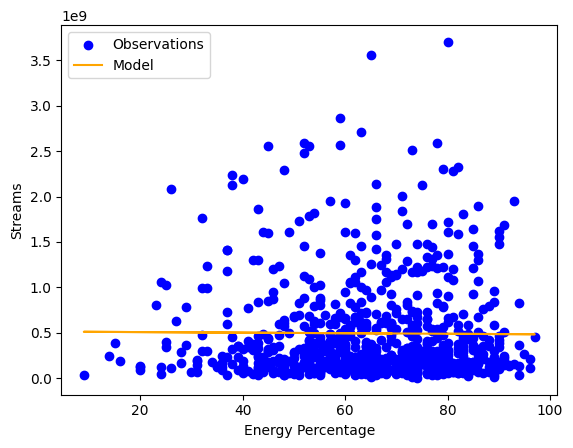

In [15]:
plt.scatter(X, Y, color='blue', label='Observations') 
plt.plot(X, train_predictions, color='orange', label='Model')
plt.xlabel('Energy Percentage')
plt.ylabel('Streams')
plt.legend()
plt.show()